In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

airbnb_uc=pd.read_csv("data/listings_CPH.csv")

In [5]:
#Dropping unnecessary columns = 

#airbnb_uc.drop("name","host_id", "neighbourhood_group","license","host_name","last_review", inplace=True, axis=1)

#name not relevant
airbnb_uc.drop('name', inplace=True, axis=1)

#host_id not relevant
airbnb_uc.drop('host_id', inplace=True, axis=1)

#neighbourhood column only contains NaN values
airbnb_uc.drop('neighbourhood_group', inplace=True, axis=1)

#license column only contains NaN values
airbnb_uc.drop("license", inplace=True, axis=1)

#host_names not relevant
airbnb_uc.drop("host_name", inplace=True, axis=1)

#last_review not relevant
airbnb_uc.drop("last_review", inplace=True, axis=1)

#Replace NaN values in reviews_per_month with 0
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)
airbnb_uc.reviews_per_month.isnull().sum()

# Create dummy variables for neighboorhood column

set(airbnb_uc['neighbourhood'])
neighbourhood = pd.get_dummies(airbnb_uc['neighbourhood'].str.lower().str.replace(' ', '_'))
airbnb_uc1 = pd.merge(airbnb_uc, neighbourhood, left_index=True, right_index=True)
airbnb_uc1 = airbnb_uc1.drop('neighbourhood', 1)

airbnb_uc1.head()

# Create dummy variables for room type column

room_type = pd.get_dummies(airbnb_uc['room_type'])
airbnb = pd.merge(airbnb_uc1, room_type, left_index=True, right_index=True)
airbnb = airbnb.drop('room_type', 1)

airbnb.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,3,172,1.08,1,0,4,...,1,0,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,4,59,0.55,1,303,8,...,0,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,3,300,2.06,3,56,7,...,0,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,7,24,0.16,1,59,2,...,0,0,0,0,1,0,1,0,0,0
4,31094,55.666602,12.555283,1954,3,19,0.13,1,0,2,...,0,0,0,0,1,0,1,0,0,0


In [6]:
# normalizing price, minimum nights, number of reviews, reviews per month, 
# calculated host listings count and availibilty for values between 0 and 1.

def normalizing(column):
    new_column = (column - column.min()) / (column.max() - column.min())
    return new_column

#airbnb['price'] = normalizing(airbnb['price'])
airbnb['minimum_nights'] = normalizing(airbnb['minimum_nights'])
airbnb['number_of_reviews'] = normalizing(airbnb['number_of_reviews'])
airbnb['reviews_per_month'] = normalizing(airbnb['reviews_per_month'])
airbnb['calculated_host_listings_count'] = normalizing(airbnb['calculated_host_listings_count'])
airbnb['availability_365'] = normalizing(airbnb['availability_365'])
airbnb['number_of_reviews_ltm'] = normalizing(airbnb['number_of_reviews_ltm'])

airbnb.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,1,0,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,1,0,1,0,0,0
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,1,0,1,0,0,0


In [7]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
count,1.381500e+04,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,...,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000
mean,1.719385e+17,55.680569,12.557805,1205.878972,0.003248,0.026120,0.033147,0.019105,0.255624,0.011573,...,0.164169,0.109374,0.047991,0.025335,0.165762,0.000072,0.885197,0.001086,0.112269,0.001375
std,2.852538e+17,0.021088,0.033512,1433.143149,0.015225,0.051199,0.045081,0.119655,0.337430,0.024149,...,0.370443,0.312119,0.213756,0.157146,0.371880,0.008508,0.318795,0.032934,0.315709,0.037061
min,6.983000e+03,55.609510,12.435670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.907962e+07,55.666110,12.540285,729.000000,0.000901,0.002813,0.006245,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.931542e+07,55.681190,12.555520,995.000000,0.001802,0.009845,0.017902,0.000000,0.054795,0.006369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.665348e+17,55.695770,12.580741,1368.500000,0.002703,0.028129,0.041632,0.000000,0.476712,0.012739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.222925e+17,55.742800,12.651740,64900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#df=pd.read_csv("listings_CPH.CSV")
df=airbnb.copy()

In [9]:
df.shape

(13815, 26)

In [10]:

#df_price=df.price.copy()
#df_price[1].sort_values(ascending=True)

#df_price['price']=df_price[1]
#df_price.head()
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,1,0,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,1,0,1,0,0,0
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,1,0,1,0,0,0


# Target variable for binary Classifier: (Her Begynner min del...)
Firstly, we want to make a binary classifier. We therefore need reduce the different prices to a categorical binary target variable. We 
will use the categories ‘low’ and 'high' as the target variable. To separate the data we need to define a treshold, were observations with a 
rental price below the threshold will be categorized as 'low', and observations with renatl price above the threshold will be categorized as
'high'. We will here take a look at both the median and the mean.

In [11]:
median=df.price.median()
mean=df.price.mean()
print(median)

995.0


In [13]:
print('number of houses with pricing over the mean', len(df[df.price>mean]))
print('number of houses with pricing below the mean', len(df[df.price<mean]))
print('number of houses with pricing over the median', len(df[df.price>median]))
print('number of houses with pricing below the median', len(df[df.price<median]))

number of houses with pricing over the mean 4280
number of houses with pricing below the mean 9535
number of houses with pricing over the median 6845
number of houses with pricing below the median 6899


We can see that the median splits the observations more evenly than using the mean. 
We will therefore use the median as threshold, to gain a more balanced dataset.

In [14]:
df['high']=df['price'].apply(lambda x: x>median)
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room,high
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,0,0,0,0,0,1,0,0,0,False
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,1,0,0,0,True
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,1,0,0,0,True
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,1,0,1,0,0,0,False
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,1,0,1,0,0,0,True


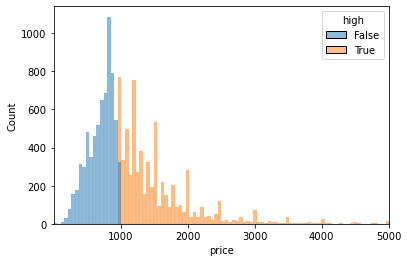

In [34]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="price", hue="high")
ax.set_xlim(1,5000)
plt.show()

# Target vairable for multi class classification: 
For the multi class classification, se will again need to reduce the the price down to a categorical attribute with 3 values: 'low', 'med', 'high'.
We will split the observations using the percentiles as threshold. This gives us a balanced dataset, which will make it easier to evaluate the results.

In [15]:

mediumPerc=np.percentile(df['price'], 33)
highPerc=np.percentile(df['price'], 66)
print(highPerc)
print(mediumPerc)

1200.0
800.0


'Low’ means that the price of the rental is lower than the 33th percentile of prices in the city,‘medium’ means that the price is between the 33th and 66th percentile, and ‘high’ that the price higher than the 66th percentile. As we can see this gives an quite eve split and a balanced dataset.

In [16]:
print('number of houses with pricing low', len(df[df.price<mediumPerc]))
print('number of houses with pricing medium', len(df[df.price > mediumPerc])-len(df[df.price>highPerc]))
print('number of houses with pricing high', len(df[df.price>highPerc]))


number of houses with pricing low 4221
number of houses with pricing medium 4799
number of houses with pricing high 4289


In [17]:
df['Price Category'] = np.where(df.price <= mediumPerc, 'low', np.where(df.price >= highPerc  , 'high', 'med'))
df.head().T

,0,1,2,3,4
id,6983,26057,26473,29118,31094
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
price,898,2600,3250,725,1954
minimum_nights,0.001802,0.002703,0.001802,0.005405,0.001802
number_of_reviews,0.241913,0.082982,0.421941,0.033755,0.026723
reviews_per_month,0.044963,0.022898,0.085762,0.006661,0.005412
calculated_host_listings_count,0.0,0.0,0.011236,0.0,0.0
availability_365,0.0,0.830137,0.153425,0.161644,0.0
number_of_reviews_ltm,0.008493,0.016985,0.014862,0.004246,0.004246


In [18]:
df2=df.copy()

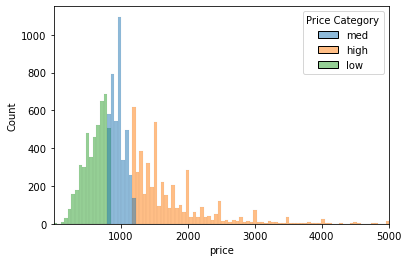

In [33]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="price", hue="Price Category")
ax.set_xlim(1,5000)
plt.show()

In [20]:

split=int(len(df2)*2.0/3)
training=df2[:split]
test=df2[split:]
x_train=training[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
x_test=test[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
y_train=training['high']
y_test=test['high']

# Binary classifiacation problem
In this section we will build an evaluate a logistic regression, support vector and random forest classifier.


Regression classifier:

In [21]:
def build_log_reg_classifiers( x_train, y_train, x_test, y_test):
    LogReg=LogisticRegression(max_iter=100000)
    LogReg.fit(x_train, y_train)
    LogReg.score(x_test,y_test)
    y_pred=LogReg.predict(x_test)
    return LogReg, y_pred

Logistic regression gives f1 score is 0.6630705394190872
Logistic regression accuracy score is 0.6473398479913138


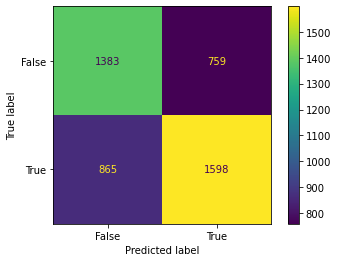

In [22]:
model, y_pred= build_log_reg_classifiers(x_train, y_train, x_test, y_test)
plot_confusion_matrix(model, x_test, y_test)  
print('Logistic regression gives f1 score is',f1_score(y_test,y_pred))
print('Logistic regression accuracy score is',model.score(x_test,y_test))

Support vector classifier:

SVC f1 score is 0.2528735632183908
SVC accuracy is 0.5342019543973942


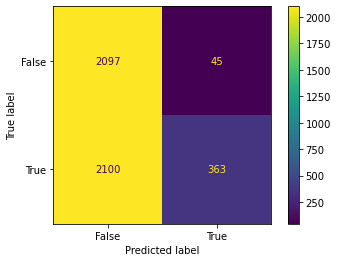

In [23]:

from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)
y_pred=sv.predict(x_test)

#Evauluating the results
plot_confusion_matrix(sv, x_test, y_test)  
print('SVC f1 score is',f1_score(y_test,y_pred))
print('SVC accuracy is',sv.score(x_test,y_test))




Random Forest Classifier:

Random Forest Classifier f1 score is 0.715862870424172
Random Forest Classifier accuracy score is 0.6814332247557003


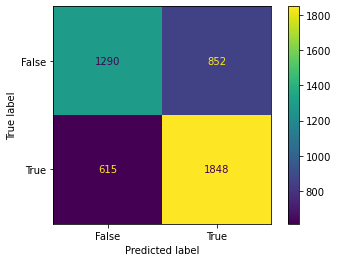

In [24]:
from sklearn.ensemble import RandomForestClassifier
Rnd_forest=RandomForestClassifier()
Rnd_forest.fit(x_train,y_train)
Rnd_forest.score(x_test,y_test)
y_pred=Rnd_forest.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Rnd_forest, x_test, y_test)  
print('Random Forest Classifier f1 score is',f1_score(y_test,y_pred))
print('Random Forest Classifier accuracy score is',Rnd_forest.score(x_test,y_test))


We can now compare the results from our random forest, support vector and our logistic regression claissifiers. From the f1 score and accuracy we can clearly see that the Random Forest Classifier gives the best results. The classifier also satisfies the bencmark of a f1 score > 0.6. The accuracy is a valid evauluation metric, beacuse the dataset is balanced, meaning it is approxiamently evenly split in half.

# Multi classification problem
For out multiclass problem, we will build and evaluate four different classifiers.


Logistic regression classifier:

the accuracy score is 0.49098805646036914
The weigted F1 score using sklearn library : 0.46656924673238137
Macro-Averaged F1 score using sklearn library : 0.4634356627757458
Micro-Averaged F1 score using sklearn library : 0.49098805646036914


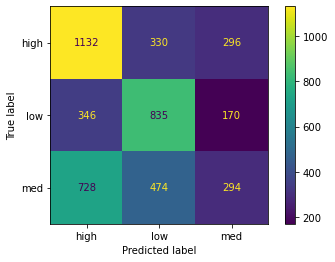

In [25]:


MultiLogReg=LogisticRegression(max_iter=100000)
y_train=training['Price Category']
y_test=test['Price Category']
MultiLogReg.fit(x_train, y_train)
MultiLogReg.score(x_test,y_test)

#Evaluation the result
y_multi_pred=MultiLogReg.predict(x_test)
plot_confusion_matrix(MultiLogReg, x_test, y_test)  
print('the accuracy score is',MultiLogReg.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'weighted')
print(f"The weigted F1 score : {weighted_f1}")



Random forest classifier:

The Random forest classifier accuracy is : 0.5311617806731813
The weigted F1 score using sklearn library : 0.5223919822496277
Macro-Averaged F1 score using sklearn library : 0.5193600382893027
Micro-Averaged F1 score using sklearn library : 0.5311617806731813


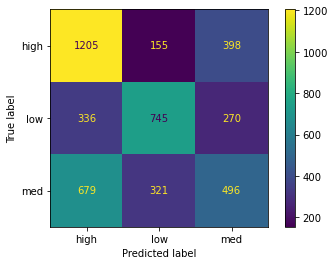

In [26]:

Multi_rnd_forest=RandomForestClassifier()
Multi_rnd_forest.fit(x_train,y_train)
Multi_rnd_forest_y_pred=Multi_rnd_forest.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Multi_rnd_forest, x_test, y_test)  
print('The Random forest classifier accuracy is :',Multi_rnd_forest.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, Multi_rnd_forest_y_pred, average = 'weighted')
print(f"The weigted F1 score: {weighted_f1}")


Support vector machine:
The input a tolerance parameter "C", also called a regularization parameter. C controls the amount of misclassifications that are allowed. 
The gamma parameter controls how much nearby points influence each other.
We test the differnt kernels to see which gives the optimal results:


In [27]:
from sklearn import svm, datasets
def buildSVM(kernelType, gammaValue, tolerationParameter):
    print(kernelType,gammaValue,tolerationParameter)
    Multi_sv=svm.SVC(kernel=kernelType, gamma=gammaValue, C=tolerationParameter).fit(x_train, y_train)
    Multi_sv.fit(x_train,y_train)
    Multi_sv.score(x_test,y_test)
    Multi_sv_y_pred=Multi_sv.predict(x_test)
    weighted_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'weighted')
    print('SVC with',kernelType,'kernel, has an accuracy of',Multi_sv.score(x_test,y_test),' and a weigted F1 score of',weighted_f1)



In [28]:
regParam=0.1
gamma=0.1
buildSVM('rbf',gamma,regParam)
buildSVM('sigmoid',gamma,regParam)
buildSVM('poly',gamma,regParam)
buildSVM('linear',gamma,regParam)


rbf 0.1 0.1
SVC with rbf kernel, has an accuracy of 0.47904451682953314  and a weigted F1 score of 0.4634677819971079
sigmoid 0.1 0.1
SVC with sigmoid kernel, has an accuracy of 0.29337676438653637  and a weigted F1 score of 0.13309335415923795
poly 0.1 0.1
SVC with poly kernel, has an accuracy of 0.49641693811074916  and a weigted F1 score of 0.4710490509131794
linear 0.1 0.1
SVC with linear kernel, has an accuracy of 0.48338762214983716  and a weigted F1 score of 0.4696557475461815


We use the optimal SVM with a polynomial kernel, a regularization parameter C=0.1 and a gamma=0.1

SVC accuracy is 0.49641693811074916
The weigted F1 score using sklearn library : 0.4710490509131794
Macro-Averaged F1 score using sklearn library : 0.4680917538180676
Micro-Averaged F1 score using sklearn library : 0.49641693811074916


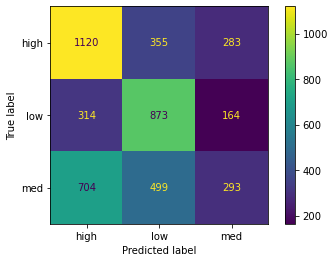

In [29]:
from sklearn import svm, datasets
Multi_sv=svm.SVC(kernel='poly',gamma=0.1, C=0.1).fit(x_train, y_train)
Multi_sv.fit(x_train,y_train)
Multi_sv.score(x_test,y_test)
Multi_sv_y_pred=Multi_sv.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Multi_sv, x_test, y_test)  
print('SVM accuracy is',Multi_sv.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'weighted')
print(f"The weigted F1 score : {weighted_f1}")


Decision tree classifier accuracy is 0.46905537459283386
The weigted F1 score using sklearn library : 0.4659948174499236
Macro-Averaged F1 score using sklearn library : 0.46442640476289193
Micro-Averaged F1 score using sklearn library : 0.46905537459283386


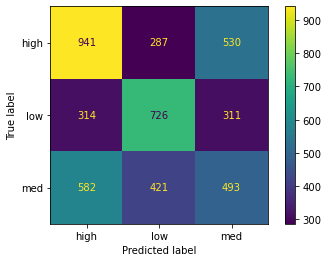

In [30]:
from sklearn.tree import DecisionTreeClassifier
my_tree=DecisionTreeClassifier()
my_tree.fit(x_train,y_train)
my_tree.score(x_test,y_test)
my_tree_y_pred=my_tree.predict(x_test)

#Evauluating the results
plot_confusion_matrix(my_tree, x_test, y_test)  
print('Decision tree classifier accuracy is',my_tree.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, my_tree_y_pred, average = 'weighted')
print(f"The weigted F1 score : {weighted_f1}")

The Random forest classifier (RFC) gives the highest accuracy of 0.53. It also provides a better weighted F1 score for all the other classifiers. Because of our balanced data set, the acccuracy may be the most intuitive and most precise performance indicator. We can compare our results with a baseline. We can calcuate this baseline by predicting that all of the observations fall within the category with most observations in the trainingset. The baseline will have an accuracy of approxiamently 0.35. 
Our RFC provides us with an 17% higher accuracy than the baseline.

We can also observe that the RFC predict observations with price category "high" most accurate, with 947 correct predictions. This is probably due to the wide range of prices that "high" includes.